<center><font size=10>Data Science and Engineering</center></font>
<center><font size=6>"Automobile Price Forecasting: A Case Study on Geely in the US"</center></font>

**LIBERRARY**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer

import random
import statsmodels.stats.weightstats as wstats
import statsmodels.stats.multicomp as multi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow


from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor,VotingClassifier,VotingRegressor,StackingClassifier,StackingClassifier
from xgboost import XGBClassifier,XGBRegressor


from warnings import filterwarnings
filterwarnings('ignore')


import pickle

In [2]:
data=pd.read_csv('car_prices.csv')

In [3]:
data.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


# PROBLEM STATEMENT

`A Chinese automobile company Geely Auto aspires` to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:
● Which variables are significant in predicting the price of a car.
● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.


**Attributes**

* TREATMENT OF REDUNDENT COLUMNS

In [4]:
data.set_index('CarName',inplace=True)

In [5]:
data.drop(columns='car_ID',inplace=True)

In [6]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
num_cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm', 'citympg', 'highwaympg',
       'price']

In [8]:
cat_col=['symboling','fueltype','aspiration','doornumber','carbody','enginetype','drivewheel','enginelocation','cylindernumber','fuelsystem']

In [9]:
data[num_cols].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* CATEGORY COLUMNS CLASSES

In [10]:
for i in cat_col:
    print(round(data[i].value_counts(normalize=True)*100))
    print()

symboling
 0    33.0
 1    26.0
 2    16.0
 3    13.0
-1    11.0
-2     1.0
Name: proportion, dtype: float64

fueltype
gas       90.0
diesel    10.0
Name: proportion, dtype: float64

aspiration
std      82.0
turbo    18.0
Name: proportion, dtype: float64

doornumber
four    56.0
two     44.0
Name: proportion, dtype: float64

carbody
sedan          47.0
hatchback      34.0
wagon          12.0
hardtop         4.0
convertible     3.0
Name: proportion, dtype: float64

enginetype
ohc      72.0
ohcf      7.0
ohcv      6.0
dohc      6.0
l         6.0
rotor     2.0
dohcv     0.0
Name: proportion, dtype: float64

drivewheel
fwd    59.0
rwd    37.0
4wd     4.0
Name: proportion, dtype: float64

enginelocation
front    99.0
rear      1.0
Name: proportion, dtype: float64

cylindernumber
four      78.0
six       12.0
five       5.0
eight      2.0
two        2.0
three      0.0
twelve     0.0
Name: proportion, dtype: float64

fuelsystem
mpfi    46.0
2bbl    32.0
idi     10.0
1bbl     5.0
spdi     4.0


In [12]:
for i in data.columns:
    print(data[i].value_counts())
    print()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

wheelbase
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
9

In [16]:
data['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

# DATA PREPROCESSING

**null**

In [11]:
data.isnull().sum().sum()


0

In [12]:
data['enginesize'].value_counts()

enginesize
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: count, dtype: int64

**DUPLICATES**

In [13]:
data[data.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,,,,,,,,,,,,,,,,,,,,,
plymouth fury iii,1,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0


In [14]:
data.duplicated().sum()

1

In [15]:
data.drop_duplicates(inplace=True)

#### OUTLIERS**

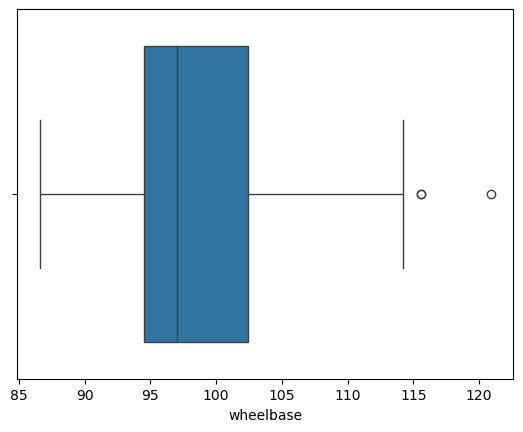

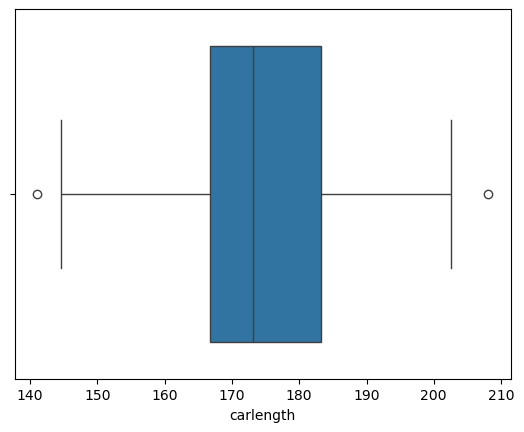

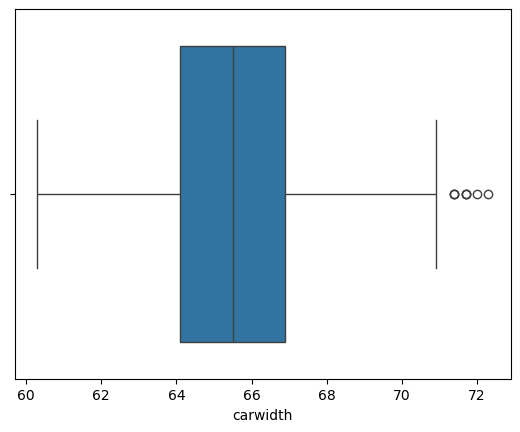

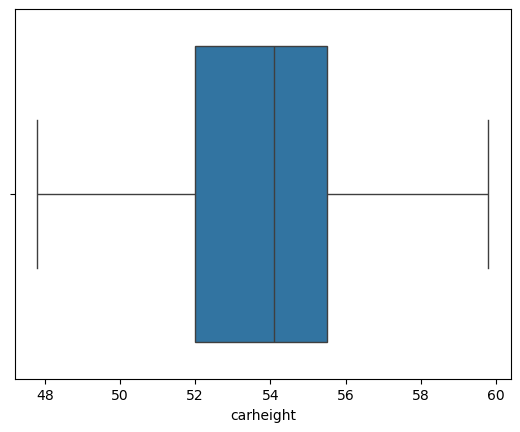

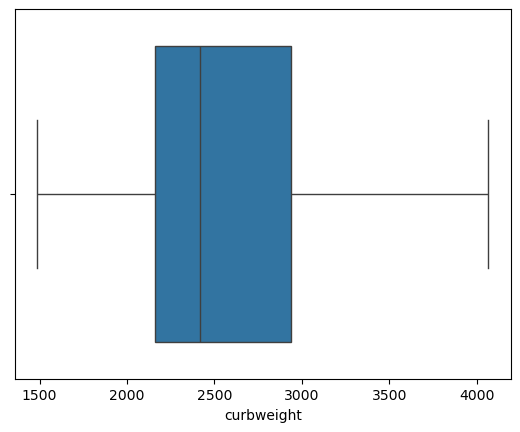

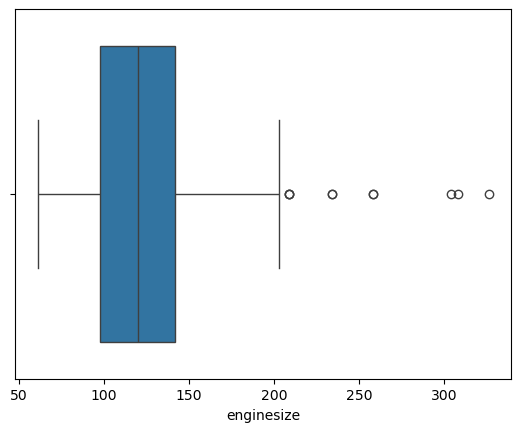

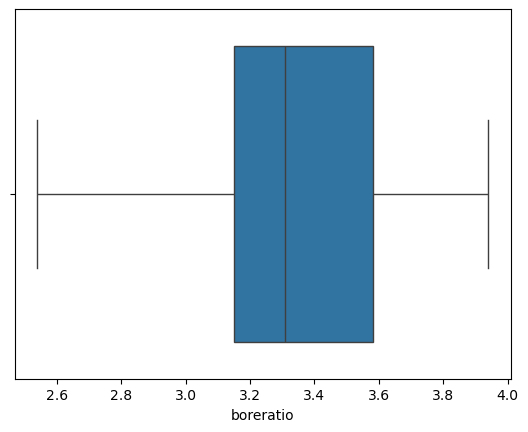

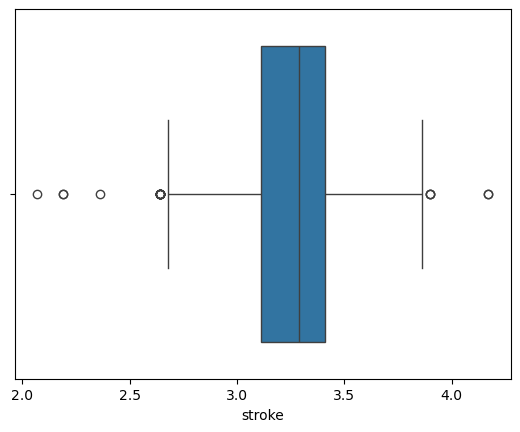

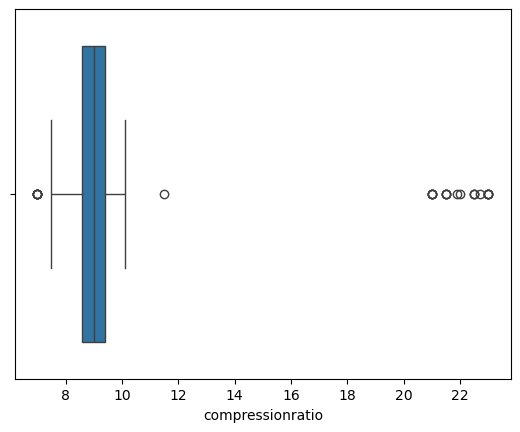

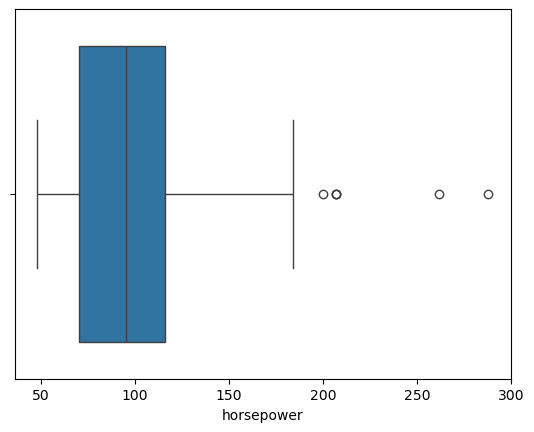

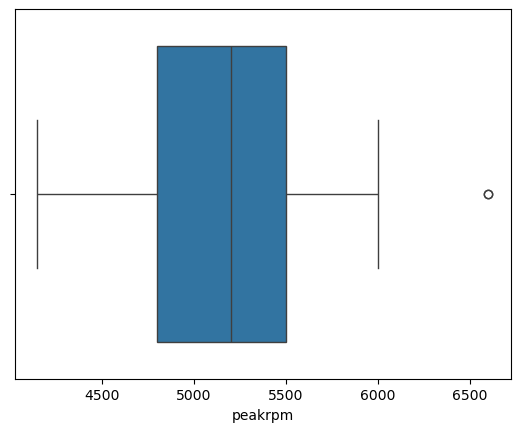

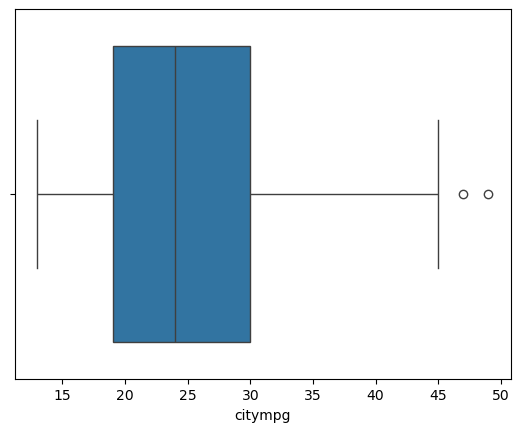

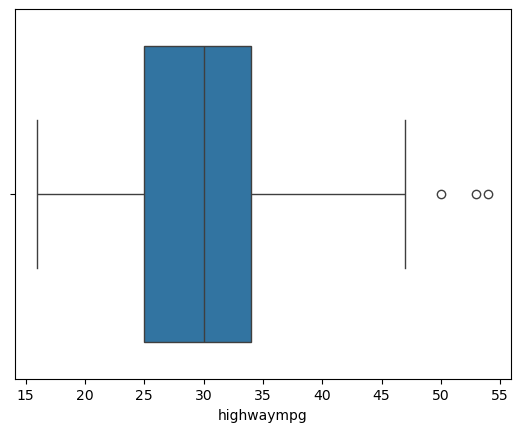

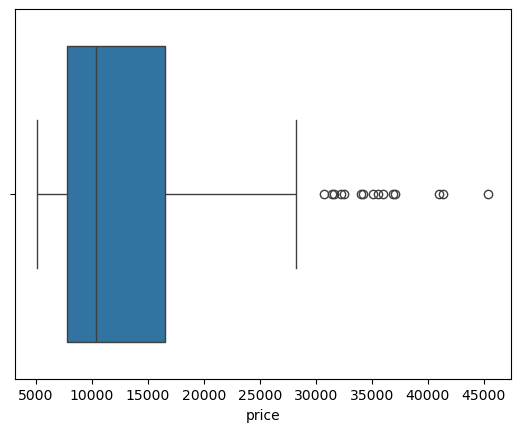

In [16]:
t=1
for i in num_cols:
    sns.boxplot(data=data[num_cols],x=i)
    plt.show()

**model have outliers**

* there are some outliers in `[[ wheel base,car length,car_width,engine size,stroke,horshpower,peakrpm,citymog,highwaympg,price,milage,compresor]]*`

##### TREATMENT OF OUTLIER

##### `CAPPING OF OUTLIER`

In [17]:
for i in num_cols:
    q3,q1=np.percentile(data[i],[75,25])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    data[i]=data[i].apply(lambda x:ll if x<ll else ul if x>ul else x )

**AFTER TREATMENT OF OUTLIER**

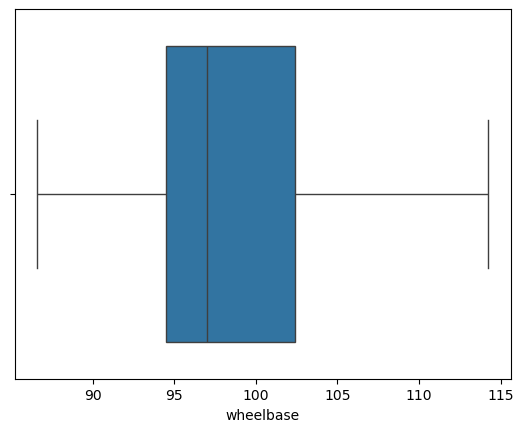

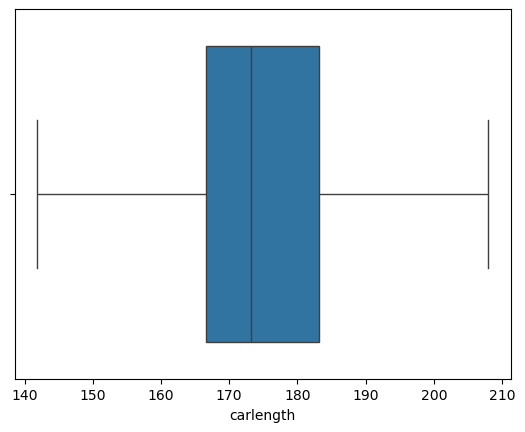

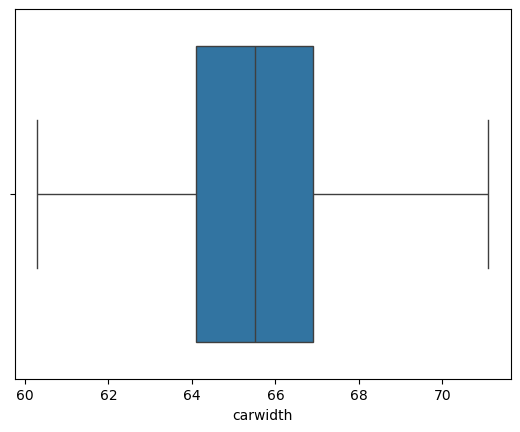

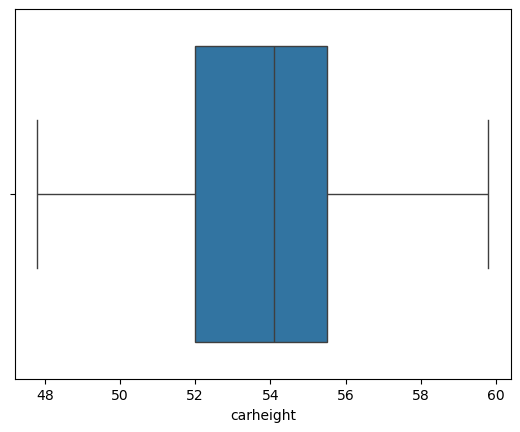

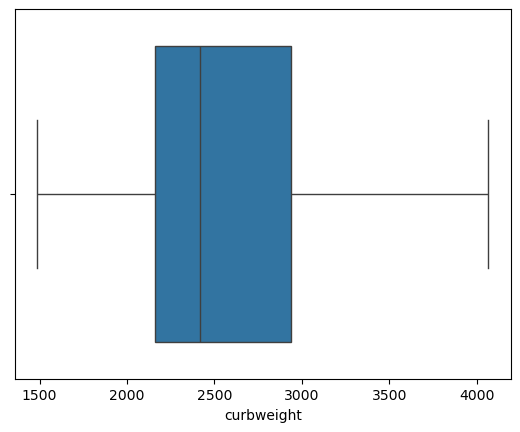

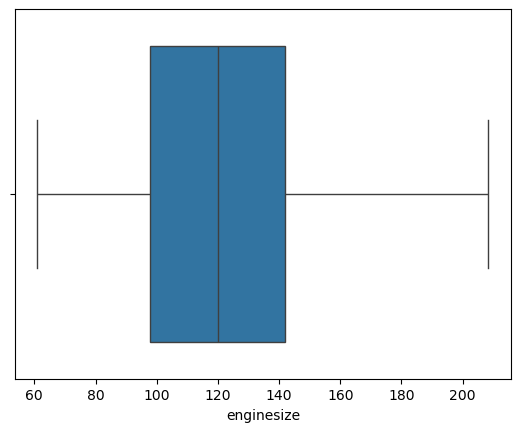

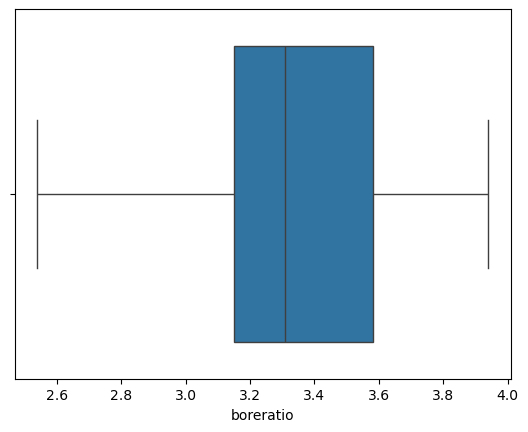

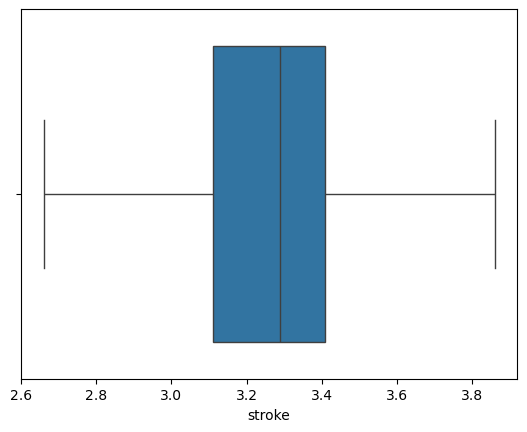

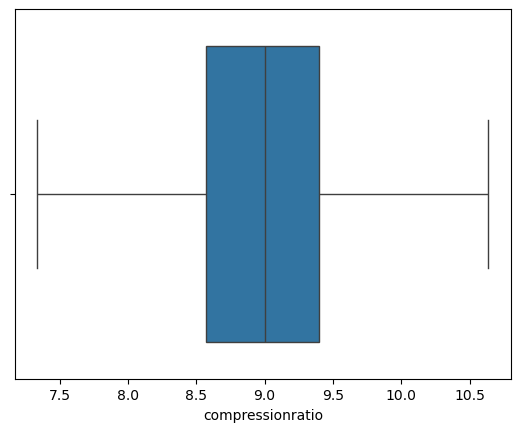

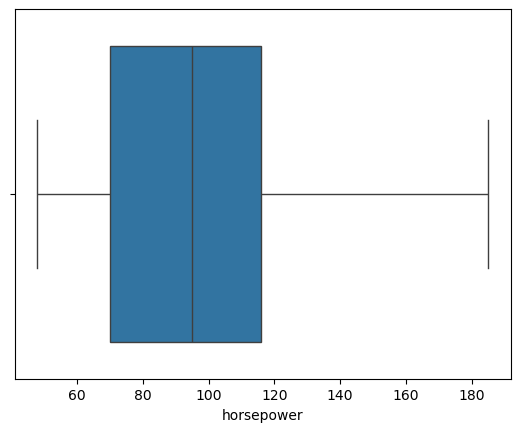

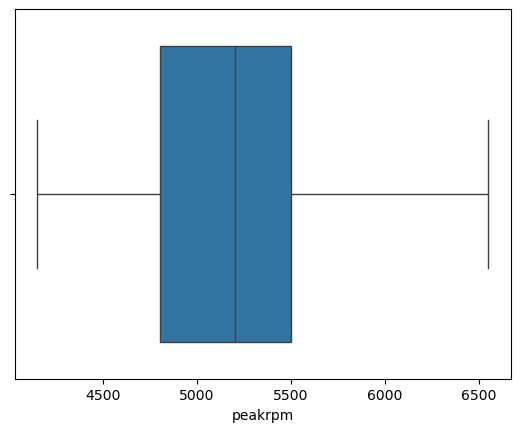

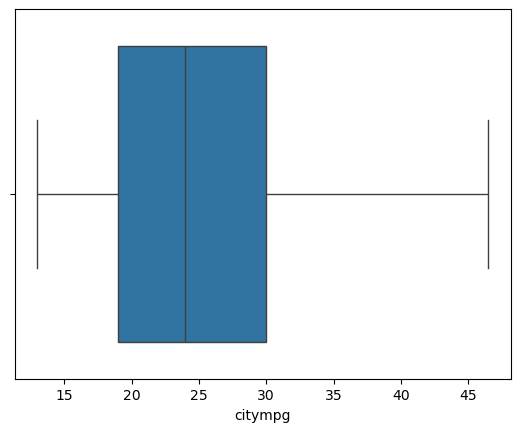

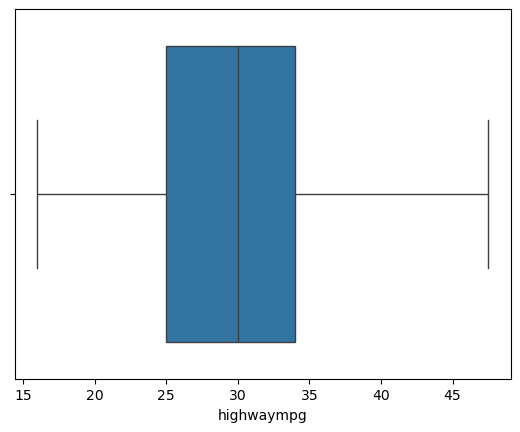

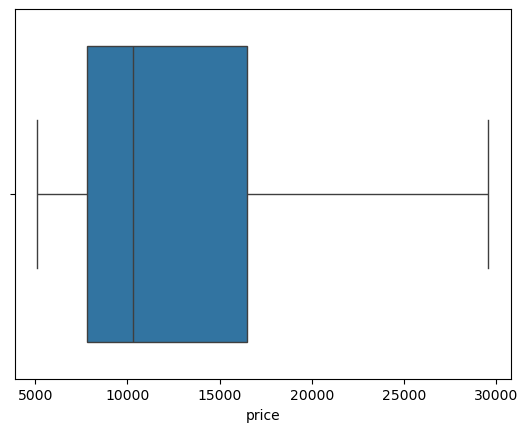

In [18]:
t=1
for i in num_cols:
    sns.boxplot(data=data[num_cols],x=i)
    plt.show()

* HERE WE CAPPED ALL THE OUTLIERS

### CORRELATION BETWEEN `FEATURES` AND `TARGET COLUMN`

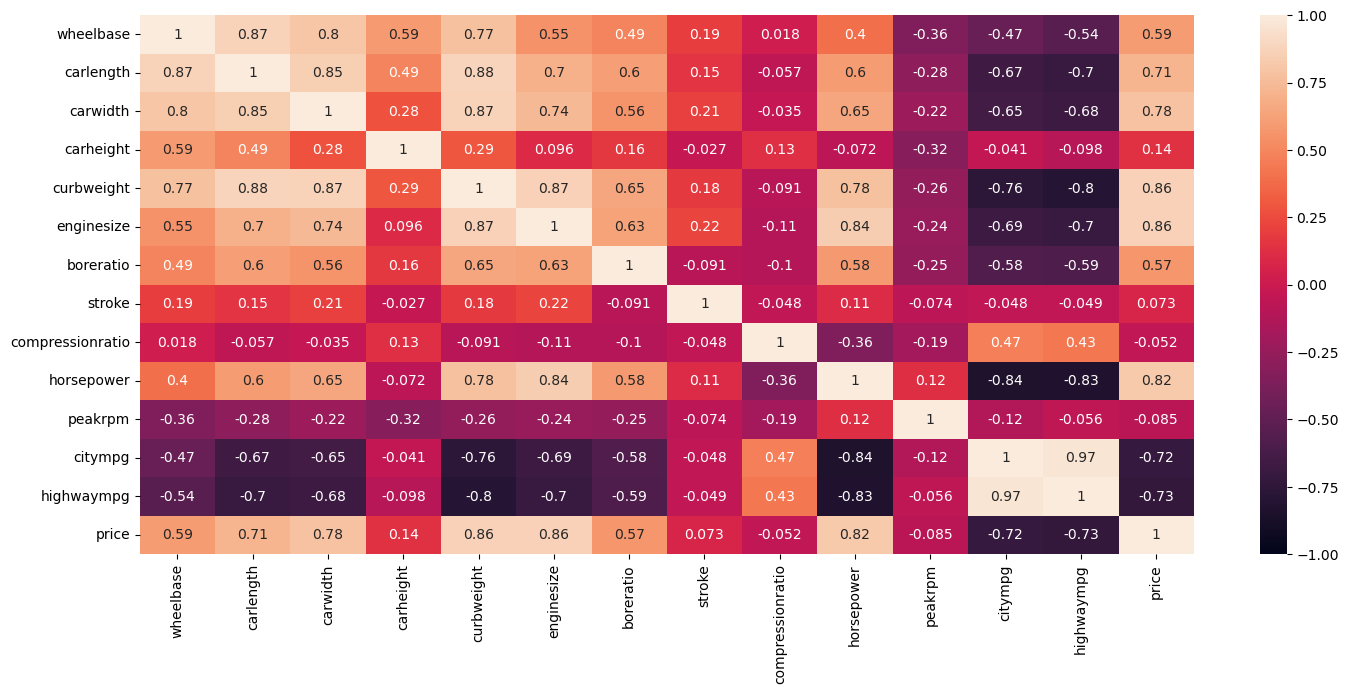

In [19]:
plt.figure(figsize=[17,7])
sns.heatmap(data=data[num_cols].corr(),vmax=1,vmin=-1,annot=True)
plt.show()

* `CITYMPG & HIGHWAYMPG` ARE HIGHLY NEGATIVELY CO-RELATED TO `PRICE`
* `CURB_WEIGHT & ENGINESIZE` ARE POSTIVELY CORRALETED TO `PRICE`

**`INSIGNIFICANT COLUMNS`**

In [20]:
data.drop(columns=['compressionratio','boreratio'],inplace=True)

**THE IS NO CORRELATION BETWEEN THESE TWO COLUMNS AND PRICE COLUMN SO WE CAN DROP COLUMNS**

### `UNIVARIENT ANALYSIS` OF CATEGORY COLUMNS:--

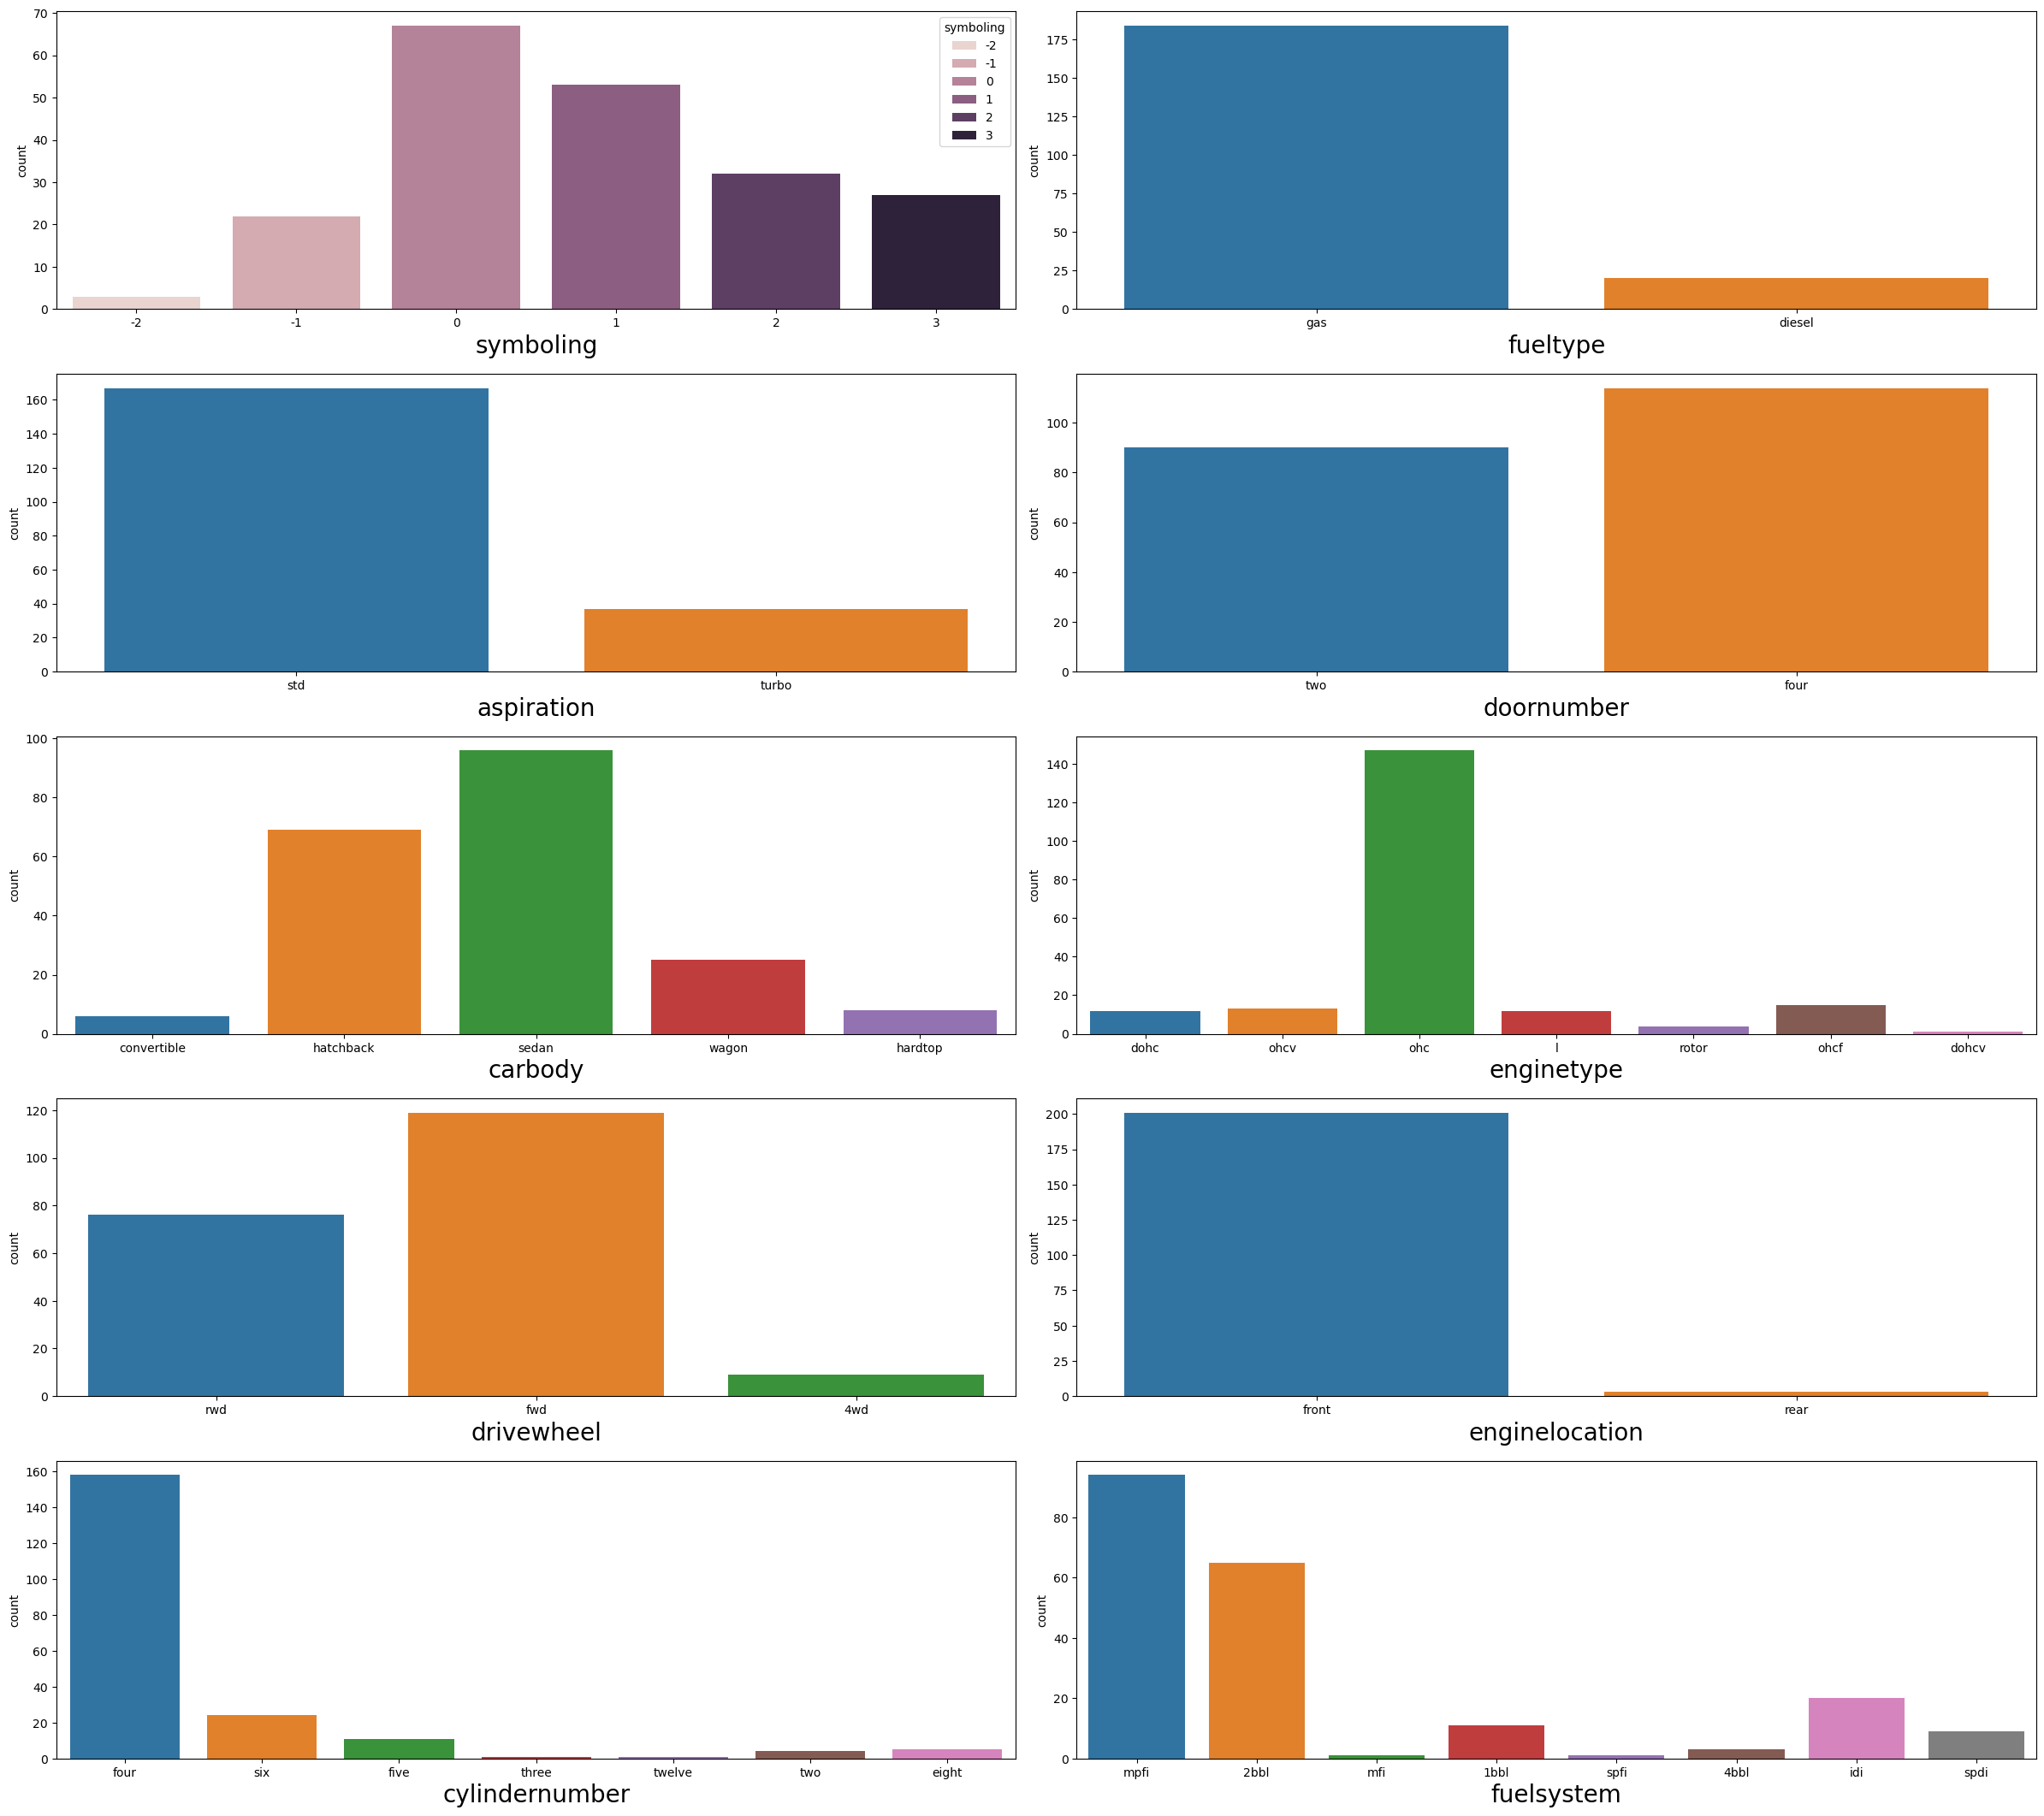

In [21]:
 t=1
plt.figure(figsize=[24,25])
for i in cat_col:
    plt.subplot(6,2,t)
    sns.countplot(data=data,x=i,hue=i)
    t+=1
    plt.xlabel(xlabel=i, fontsize=20)
plt.tight_layout()
plt.show()

**KEY POINTS**

* THERE ARE MORE CARS OF `GAS FUELTYPE`
* `SEDAN CAARBODY` IS MOST USED
* THERE ARE `4-DOORS` & `4-CYLINDERED` CAR ARE MORE PREFERED
* `FRONT-ENGINELOCATION` ARE MORE PREFFERED
* DRIVEWHEEL `FWD` MOSTLY PREFERED
* FUEL-SYSTEM MUST BE `MPFI`

In [22]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

## CATEGORY COLUMNS ANALYSIS

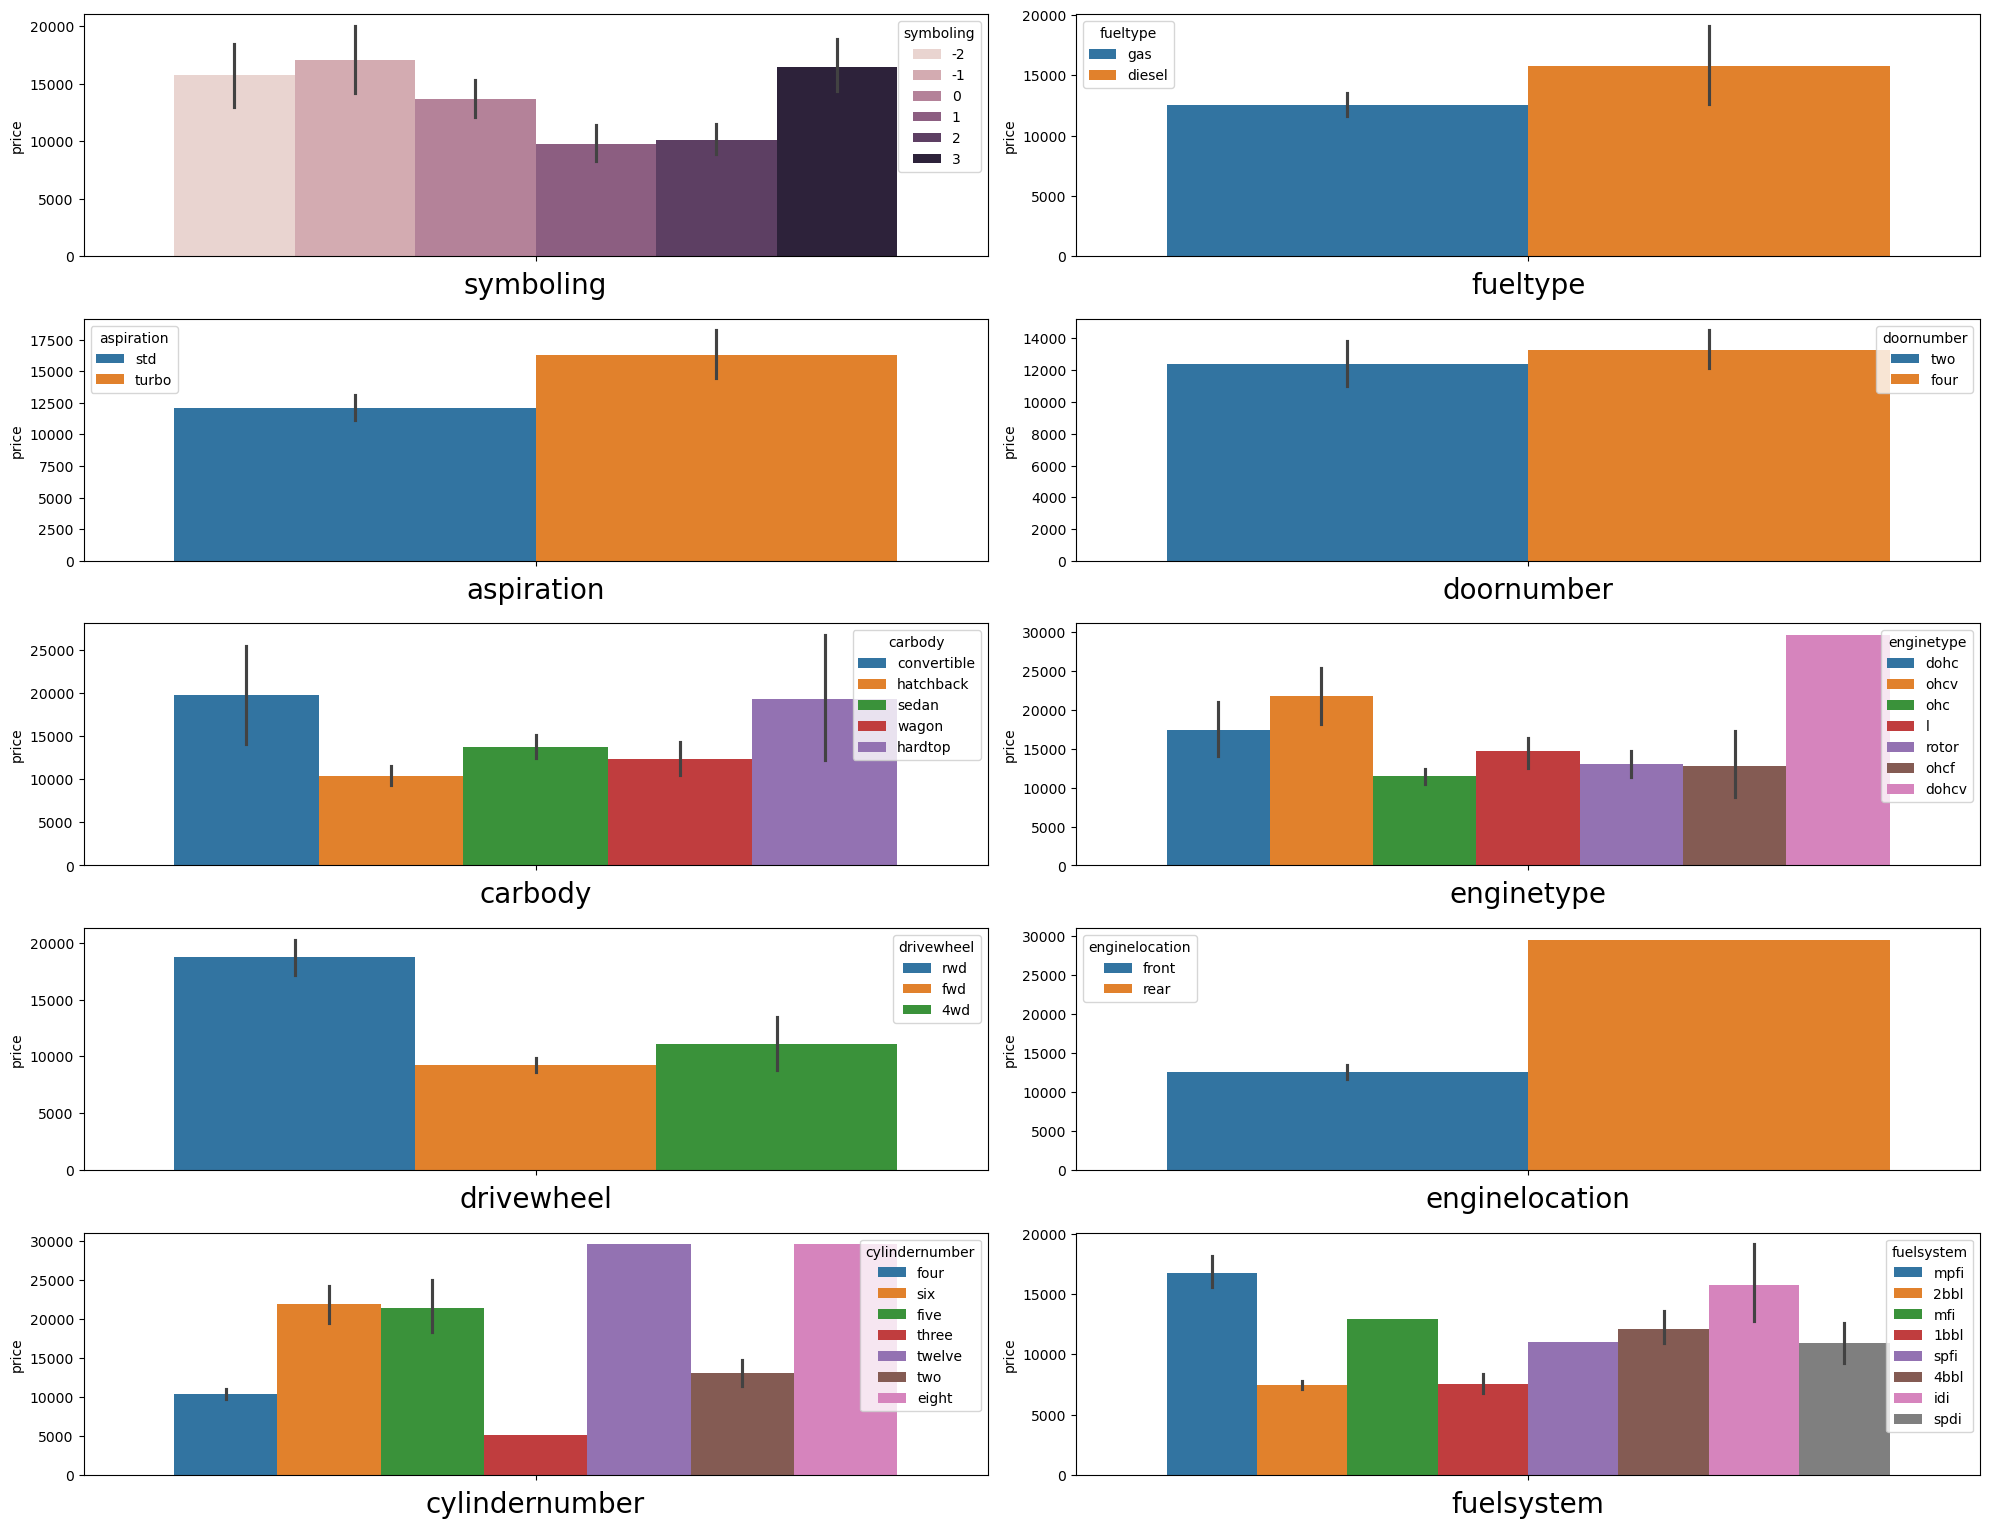

In [23]:
t=1
plt.figure(figsize=(20,18))
for i in cat_col:
    plt.subplot(6,2,t)
    sns.barplot(data=data,y=data['price'],hue=i)
    plt.xlabel(xlabel=i, fontsize=20)
    t=t+1
plt.tight_layout()
plt.show()

## ANALYSIS OF TARGET COLUMN WITH FEATURES:

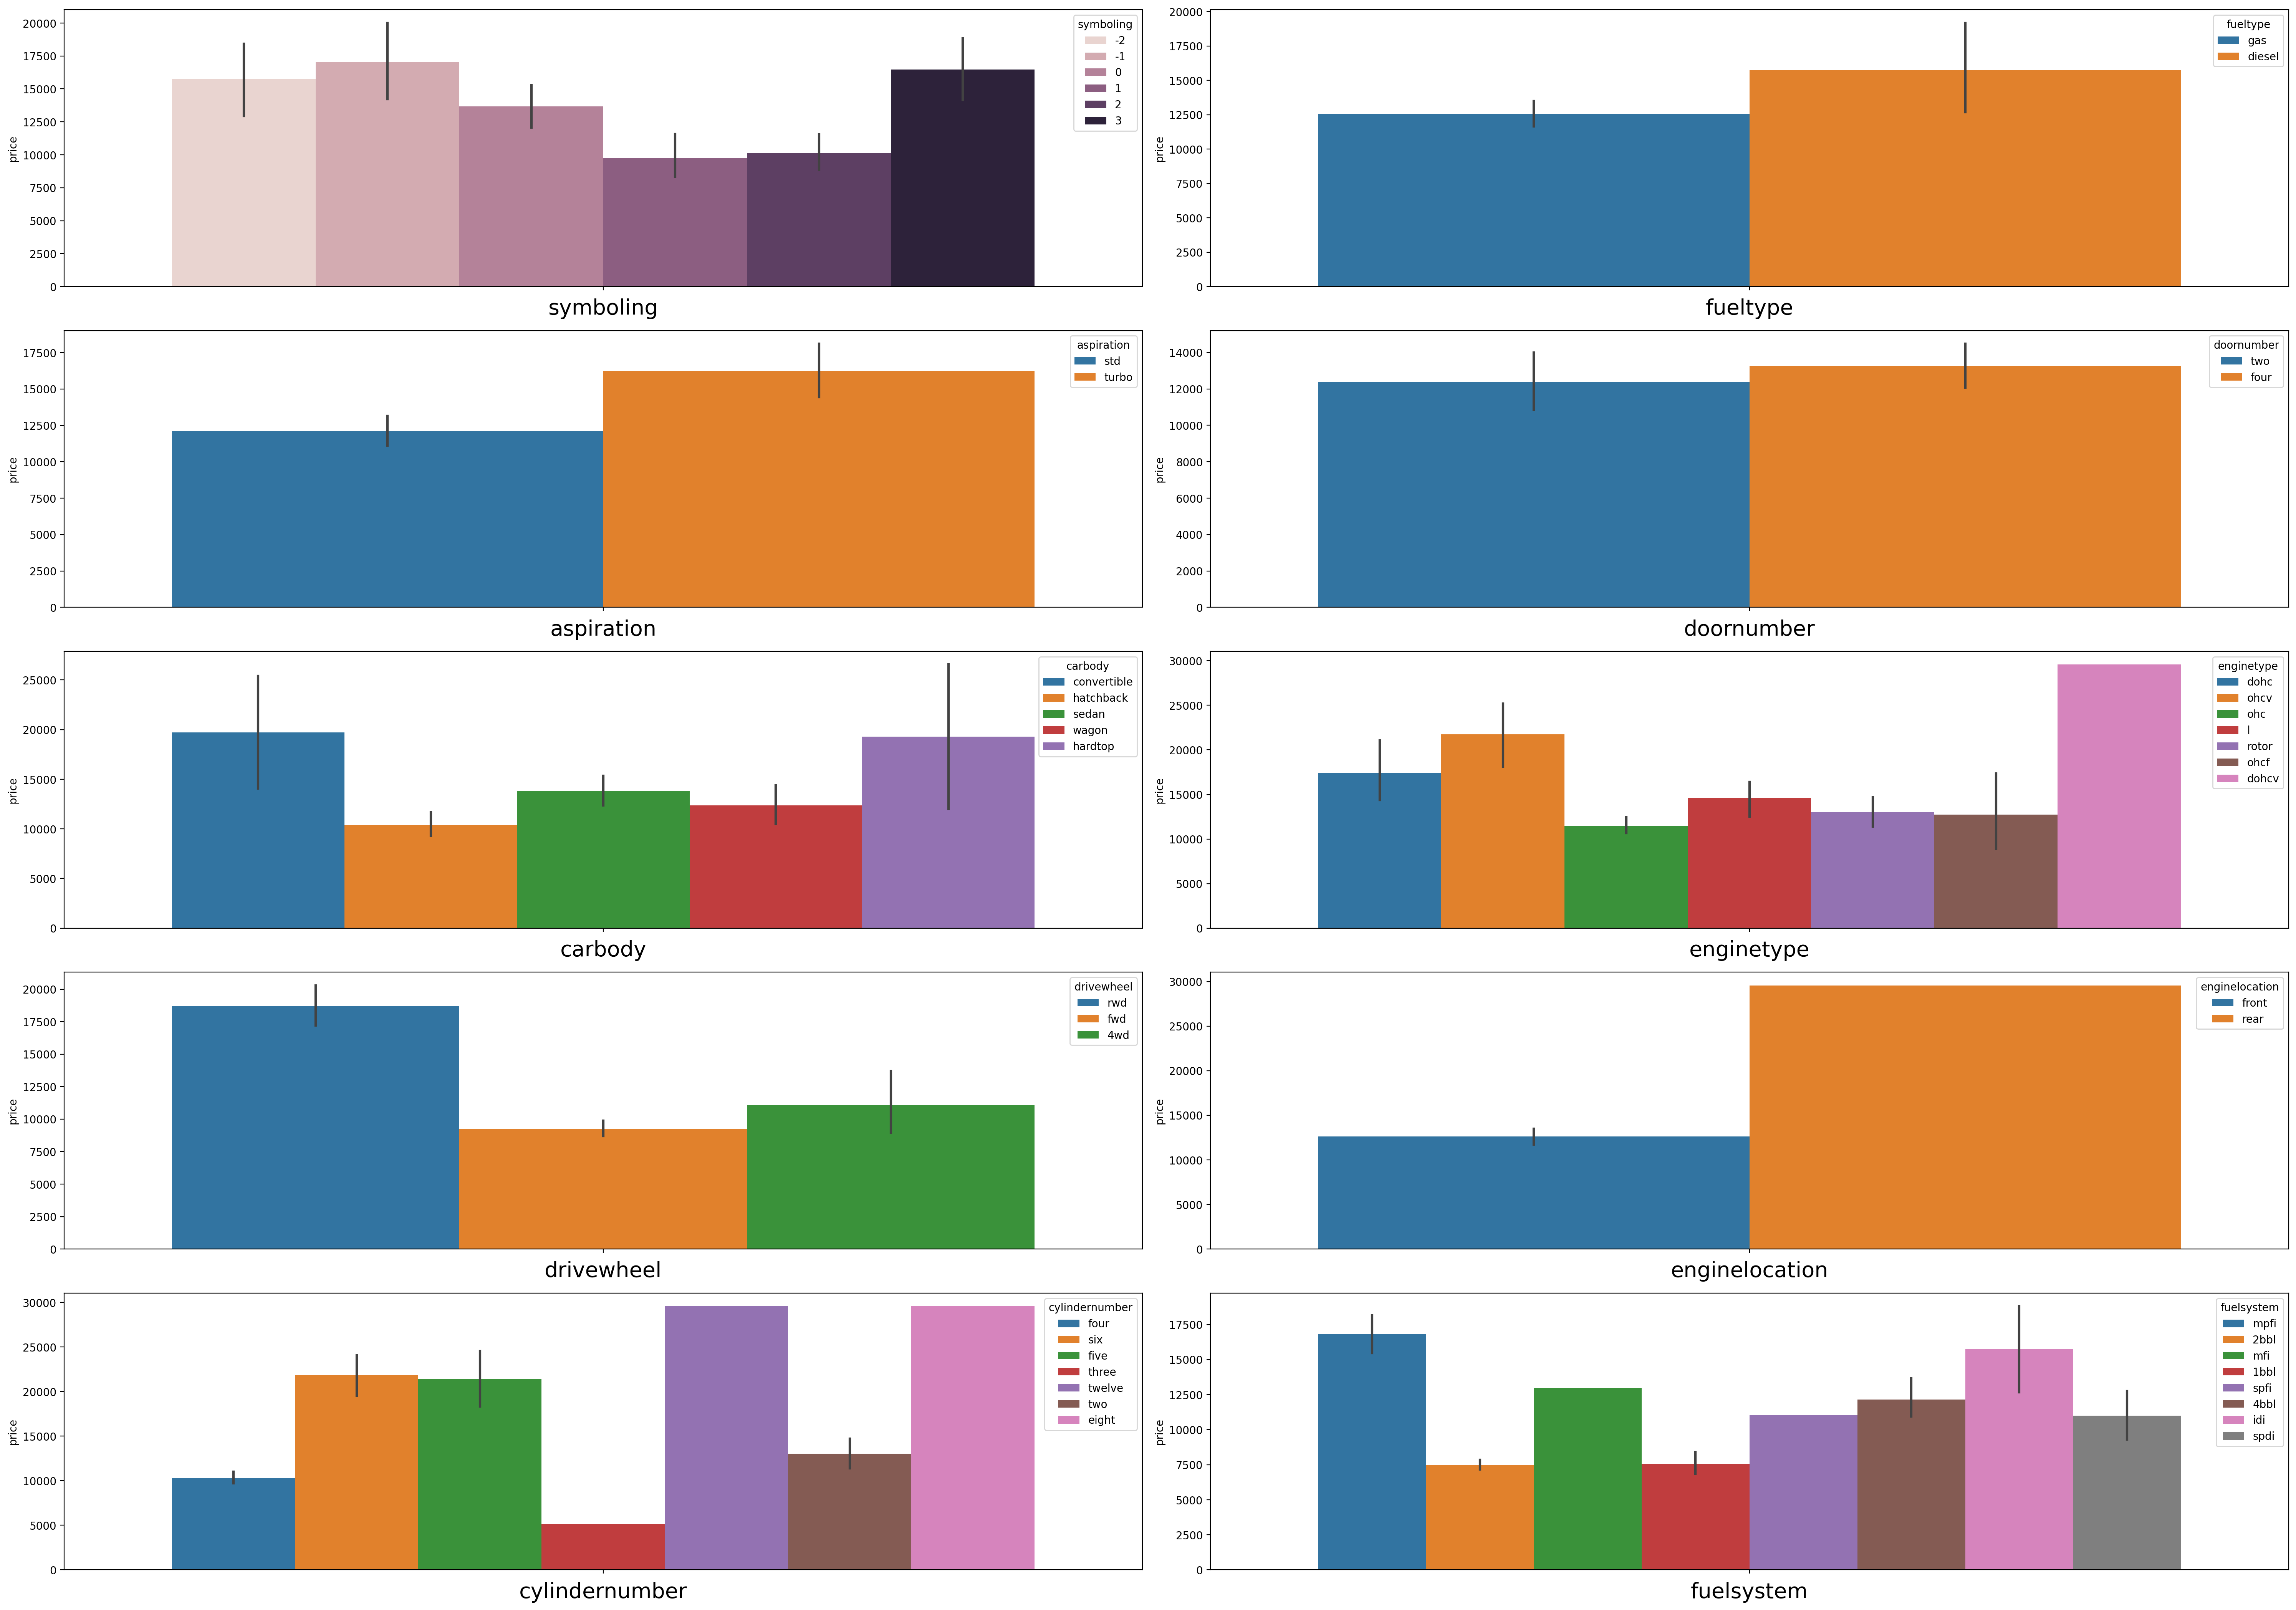

In [24]:
t=1
plt.figure(figsize=(30,29),dpi=200)
for i in cat_col:
    plt.subplot(7,2,t)
    sns.barplot(data=data,y=data['price'],hue=i)
    plt.xlabel(xlabel=i, fontsize=20)
    t=t+1
plt.tight_layout()
plt.show()

----------

**FEATURE ENGIINERING**
* AREA=L X B X H

In [25]:
data['car_area']=data['carheight']*data['carlength']*data['carwidth']

#### ENCODING

In [26]:
data['fueltype']=data['fueltype'].map({'gas':0,'diesel':1})
data['aspiration']=data['aspiration'].map({'std':0,'turbo':1})
data['doornumber']=data['doornumber'].map({'four':1,'two':0})
data['drivewheel']=data['drivewheel'].map({'fwd':0,'rwd':1,'4wd':2})
data['enginelocation']=data['enginelocation'].map({'front':0,'rear':1})
car_dict=data['carbody'].value_counts(normalize=True).to_dict()
data['carbody']=data['carbody'].map(car_dict)
e_dict=data['enginetype'].value_counts(normalize=True).to_dict()
data['enginetype']=data['enginetype'].map(e_dict)
c_dict=data['cylindernumber'].value_counts(normalize=True).to_dict()
data['cylindernumber']=data['cylindernumber'].map(c_dict)
f_dict=data['fuelsystem'].value_counts(normalize=True).to_dict()
data['fuelsystem']=data['fuelsystem'].map(f_dict)

In [27]:
data=data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, alfa-romero giulia to volvo 264gl
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       204 non-null    float64
 1   fueltype        204 non-null    float64
 2   aspiration      204 non-null    float64
 3   doornumber      204 non-null    float64
 4   carbody         204 non-null    float64
 5   drivewheel      204 non-null    float64
 6   enginelocation  204 non-null    float64
 7   wheelbase       204 non-null    float64
 8   carlength       204 non-null    float64
 9   carwidth        204 non-null    float64
 10  carheight       204 non-null    float64
 11  curbweight      204 non-null    float64
 12  enginetype      204 non-null    float64
 13  cylindernumber  204 non-null    float64
 14  enginesize      204 non-null    float64
 15  fuelsystem      204 non-null    float64
 16  stroke          204 non-null    float64
 17  horsepower     

### TRAIN-TEST SPLIT

In [28]:
x=data.drop(columns='price')
y=data['price']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=2)

In [30]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(142, 22) (62, 22) (142,) (62,)


### `Statistically analysis`**

In [31]:
y.mean()

12863.316382352941

In [32]:
y_train.mean()

12896.87676056338

In [33]:
y_test.mean()

12786.45229032258

**we have to check statistically  PROVE that is data of `mean of ytrain= mean of ytest or not`**

* ASSUMPTION OF TWO SAMPLE T-TEST

In [34]:
st,p_val=stats.shapiro(y_train)

if p_val>0.05:
    print('Data is NORMAL')
else:
    print('DATA IS NOT NORMAL')

DATA IS NOT NORMAL


In [35]:
sample1=y_train
sample2=y_test

In [36]:
st,pval=stats.levene(sample1,sample2)

if pval>0.05:
    print('DATA HAVE EQUAL VARIENCE')
else:
    print('UNEQUAL VARIENCE')

DATA HAVE EQUAL VARIENCE


**HYPOTHESIS**

##### TWO SAMPLE T-TEST

In [37]:
tstats,p_val=stats.mannwhitneyu(sample1,sample2)

# **with 95% confidence level**

if 2*p_val>0.05:
    print('fail to reject ho')
else:
    print('reject ho')

fail to reject ho


**hence we can say ``mu1 = mu2``**

# `MODEL FITTING`

# LOGIC REGRESSOR MODEL

In [38]:
MODEL=sma.OLS(y,sma.add_constant(x)).fit()

In [39]:
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     87.93
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.77e-84
Time:                        10:56:30   Log-Likelihood:                -1835.9
No. Observations:                 204   AIC:                             3718.
Df Residuals:                     181   BIC:                             3794.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.615e+04   6.73e+04      1.280      0.202   -4.67e+04    2.19e+05
symboling        352.8389    195.105      1.808      0.072     -32.133     737.811
fueltype        2691.8749    997.622      2.698      0.008     723.409    4660.340
aspiration      -528.0685    676.820     -0.780      0.436   -1863.540     807.403
doornumber       235.0342    472.742      0.497      0.620    -697.760    1167.828
carbody         1932.1581   1250.395      1.545      0.124    -535.068    4399.384
drivewheel       363.6247    380.122      0.957      0.340    -386.416    1113.665
enginelocation  8982.0196   1652.250      5.436      0.000    5721.871    1.22e+04
wheelbase        164.2852     81.239      2.022      0.045       3.988     324.582
carlength       -400.9653    184.385     -2.175      0.031    -764.785     -37.146
carwidth        -469.1933    523.120     -0.897      0.371   -1501.391     563.005
carheight      -1098.6965    586.253     -1.874      0.063   -2255.465      58.072
curbweight         6.1793      1.360      4.545      0.000       3.496       8.862
enginetype      4923.3889    732.847      6.718      0.000    3477.367    6369.411
cylindernumber -4386.9930    795.253     -5.516      0.000   -5956.152   -2817.833
enginesize        24.1085     15.847      1.521      0.130      -7.161      55.378
fuelsystem       705.5174   1498.456      0.471      0.638   -2251.171    3662.206
stroke         -4432.4714    788.797     -5.619      0.000   -5988.891   -2876.052
horsepower        48.7336     16.593      2.937      0.004      15.992      81.475
peakrpm            0.6339      0.491      1.291      0.198      -0.335       1.603
citympg          -48.4476    113.137     -0.428      0.669    -271.685     174.790
highwaympg        56.6637    111.394      0.509      0.612    -163.134     276.462
car_area           0.0895      0.052      1.737      0.084      -0.012       0.191
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.118
Skew:                           0.055   Prob(JB):                        0.943
Kurtosis:                       3.042   Cond. No.                     2.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MODEL NORMALITY CHECK

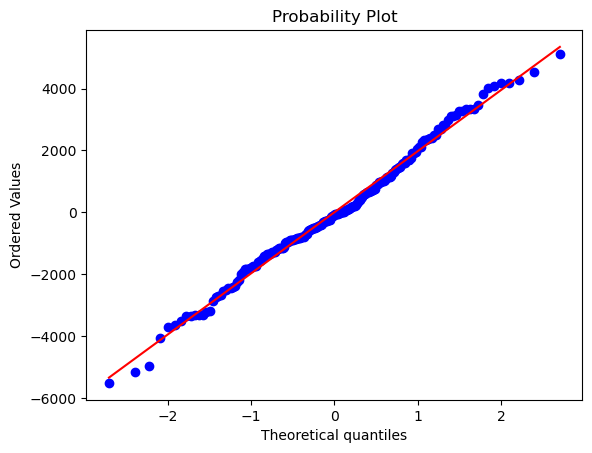

In [40]:
stats.probplot(MODEL.resid,plot=plt)
plt.show()

* MODEL IS APPROX NORMAL 

-----------

### MULTI-COLENIARITY

* BEFORE TREAT MULTICOL...

In [41]:
vif_list=[]
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

In [42]:
pd.DataFrame({'VIF':vif_list},index=x.columns)

,VIF
symboling,3.928669
fueltype,4.406272
aspiration,3.680022
doornumber,5.885371
carbody,10.563340
drivewheel,3.724114
enginelocation,1.839755
wheelbase,2647.477998
carlength,3402.013690
carwidth,3418.291576


#### Treat multicolinearity & feature enginnering**

**TREAT-MULTICOLINEARITY**

* checking of significant columns for prediction 

In [43]:
sma.OLS(y,sma.add_constant(x.drop(columns=['curbweight']))).fit().rsquared

0.9046766825214596

#### COLUMNS WE HAVE TO DROP ARE HAVINGH HIGH MULTI COLINEARITY
* carbody
* wheelbase
* enginesize
* peakrpm
* citympg
* highwaympg
* carlength
* carwidth
* carheight

In [44]:
x.drop(columns='carbody',inplace=True)
x.drop(columns='wheelbase',inplace=True)
x.drop(columns='enginesize',inplace=True)
x.drop(columns='peakrpm',inplace=True)
x.drop(columns='citympg',inplace=True)
x.drop(columns='highwaympg',inplace=True)
x.drop(columns=['carlength','carwidth','carheight'],inplace=True)

#### We CAN NOT DROP THESE UNTIL HAVE HIGH MULTICOLINEARITY.
* cylindernumber
* stroke
* car_area
* cylindernumber
* stroke
* horsepower
* curbweight

**TREATED COLUMNS**

In [45]:
vif_list=[]
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

In [46]:
pd.DataFrame({'VIF':vif_list},index=x.columns)

,VIF
symboling,2.886409
fueltype,2.824477
aspiration,2.361472
doornumber,4.986935
drivewheel,3.018360
enginelocation,1.369853
curbweight,315.362344
enginetype,7.775909
cylindernumber,10.283274
fuelsystem,12.686449


##### FINAL LR MODEL

In [47]:
full_model=sma.OLS(y,sma.add_constant(x)).fit()

In [48]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     129.2
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           8.21e-87
Time:                        10:56:31   Log-Likelihood:                -1853.5
No. Observations:                 204   AIC:                             3735.
Df Residuals:                     190   BIC:                             3781.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            603.1321   2863.856      0.211      0.833   -5045.905    6252.169
symboling        114.1028    177.947      0.641      0.522    -236.902     465.108
fueltype        2970.4355    840.105      3.536      0.001    1313.305    4627.566
aspiration      -540.6247    561.312     -0.963      0.337   -1647.829     566.579
doornumber      -169.5313    464.766     -0.365      0.716   -1086.295     747.232
drivewheel       -71.2653    372.252     -0.191      0.848    -805.543     663.012
enginelocation  8425.5032   1523.843      5.529      0.000    5419.679    1.14e+04
curbweight         7.3679      1.071      6.879      0.000       5.255       9.481
enginetype      5023.8492    729.697      6.885      0.000    3584.502    6463.197
cylindernumber -5480.1933    768.606     -7.130      0.000   -6996.290   -3964.097
fuelsystem       443.1089   1537.275      0.288      0.773   -2589.209    3475.427
stroke         -4159.2248    804.377     -5.171      0.000   -5745.881   -2572.569
horsepower        59.1387     12.375      4.779      0.000      34.729      83.549
car_area           0.0019      0.005      0.386      0.700      -0.008       0.011
==============================================================================
Omnibus:                        4.749   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                5.376
Skew:                          -0.181   Prob(JB):                       0.0680
Kurtosis:                       3.708   Cond. No.                     1.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**WE GOT 89% ACCURATE MODEL USING LR MODEL**

### DUE TO MULTICOLENIARITY WE CAN USE `RIDGE MODEL`

In [49]:
rid=Ridge()

In [50]:
rid.fit(x_train,y_train)

Ridge()

In [51]:
y_ridge_test=rid.predict(x_test)
y_ridge_train=rid.predict(x_train)

* ERROR SCORES OF TRAIN & TEST

In [52]:
print('R2:',r2_score(y_train,y_ridge_train))
print('MSE:',mean_squared_error(y_train,y_ridge_train))
print('RMSE:',mean_squared_error(y_train,y_ridge_train)**0.5)
print('MAE:',mean_absolute_error(y_train,y_ridge_train))
print('MAPE:',mean_absolute_percentage_error(y_train,y_ridge_train))

print('\n')

print('R2:',r2_score(y_test,y_ridge_test))
print('MSE:',mean_squared_error(y_test,y_ridge_test))
print('RMSE:',mean_squared_error(y_test,y_ridge_test)**0.5)
print('MAE:',mean_absolute_error(y_test,y_ridge_test))
print('MAPE:',mean_absolute_percentage_error(y_test,y_ridge_test))

R2: 0.9290579238437366
MSE: 3436417.381981327
RMSE: 1853.75763841483
MAE: 1391.1246189493427
MAPE: 0.11591888822542554


R2: 0.8157193460647989
MSE: 6770412.643349808
RMSE: 2602.001660904506
MAE: 2106.1200988424894
MAPE: 0.16596469175637196


**==MODEL HAVE HIGH VARIENCE AND OVERFITTED**

###### MODEL COFICIENT

In [53]:
pd.DataFrame({'COEF_RIDGE':rid.coef_},index=x_train.columns)

,COEF_RIDGE
symboling,353.294904
fueltype,2655.437832
aspiration,-236.108551
doornumber,181.847890
carbody,60.819804
drivewheel,579.317513
enginelocation,5271.114765
wheelbase,1.542993
carlength,-529.569928
carwidth,-614.607211


* CAR AREA 
* WHEEL BASE
* PEAKRPM

* 
**THESE ARE SOME INSIGNIFICANT COLUMNS TO PREDICT PRICE**

##### WE GOT `89%` ACCURACY OF DATA USING BASIC MODLE OF LINEAR REGRESSION

-------------

------

**BEST MODEL PREDICTION**

In [54]:
# Lists to store results for regression models
mod = []
r_squared = []
mae = []
mse = []
rmse = []
mape = []

# Regression model validation function
def model_validation(model, xtrain, ytrain, xtest, ytest):
    # Step 1: Fit the model
    model.fit(xtrain, ytrain)
    
    # Step 2: Make predictions
    y_pred = model.predict(xtest)
    
    # Step 3: Calculate regression metrics
    r2 = r2_score(ytest, y_pred)
    mse_val = mean_squared_error(ytest, y_pred)
    mae_val = mean_absolute_error(ytest, y_pred)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(y_test,y_pred)
        
    # Print metrics
    print(f"R-Squared: {round(r2,2)}")
    print(f"Mean Absolute Error (MAE): {round(mae_val,2)}")
    print(f"Mean Squared Error (MSE): {round(mse_val,2)}")
    print(f"Root Mean Squared Error (RMSE): {round(rmse_val,2)}")
    print(f"Mean absolute percentage Error(MAPE) : {round(mape_val,2)}")
    
    # Step 4: Plot residuals
    residuals = ytest - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    # Step 5: Ask if user wants to save the result
    ans = input('Do you want to save the result? Y/N: ')
    if ans.lower() == 'y':
        mod.append(str(model))
        r_squared.append(r2)
        mae.append(mae_val)
        mse.append(mse_val)
        rmse.append(rmse_val)
        mape.append(mape_val)
        
        # Step 6: Update the scorecard with results
        global scorecard_reg
        scorecard_reg = pd.DataFrame({
            'Model': mod,
            'R-Squared': r_squared,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape})
        print("\nResults saved to regression scorecard!")
    else:
        return


**MODEL TUNING**

In [55]:
def tuning_parameter(grid,estimator,x,y,score = 'r2'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

**BEST MODEL CHECKING**

# 1-RANDOM_FOREST

R-Squared: 0.81
Mean Absolute Error (MAE): 1692.99
Mean Squared Error (MSE): 6818680.99
Root Mean Squared Error (RMSE): 2611.26
Mean absolute percentage Error(MAPE) : 0.12


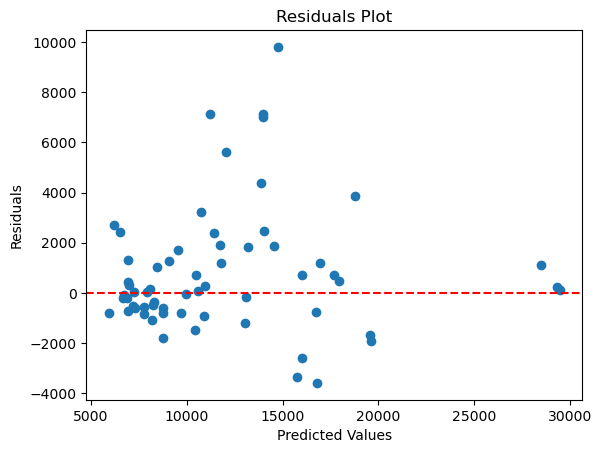

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [56]:
model_validation(RandomForestRegressor(),x_train,y_train,x_test,y_test)

# 2-GRADIENT BOOST REGRESSOR

R-Squared: 0.82
Mean Absolute Error (MAE): 1675.34
Mean Squared Error (MSE): 6552987.43
Root Mean Squared Error (RMSE): 2559.88
Mean absolute percentage Error(MAPE) : 0.13


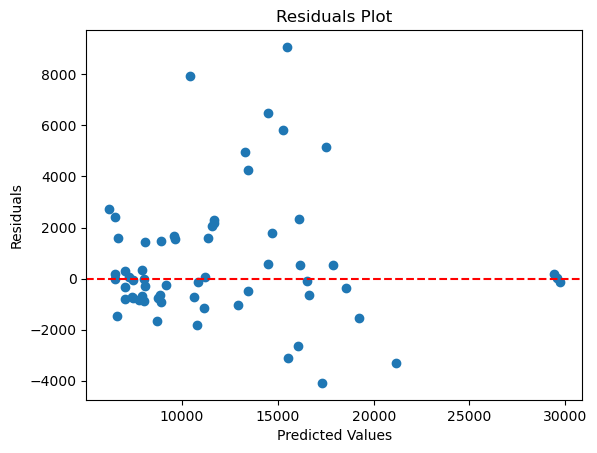

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [57]:
model_validation(GradientBoostingRegressor(),x_train,y_train,x_test,y_test)

## 3-(XG-BOOST)

R-Squared: 0.84
Mean Absolute Error (MAE): 1489.09
Mean Squared Error (MSE): 5807056.81
Root Mean Squared Error (RMSE): 2409.78
Mean absolute percentage Error(MAPE) : 0.11


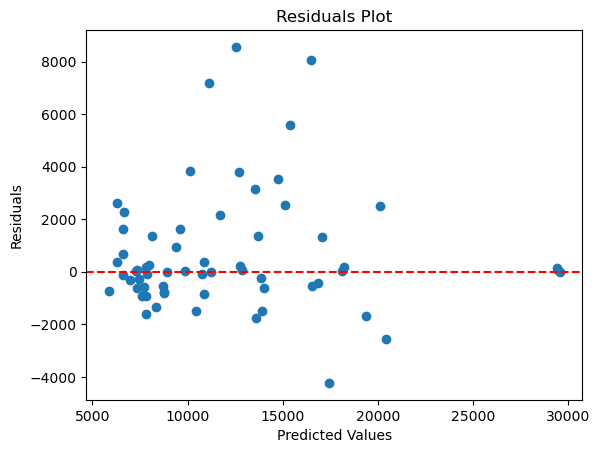

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [58]:
model_validation(XGBRegressor(),x_train,y_train,x_test,y_test)

# 4-ADA BOOST REGRESSOR

R-Squared: 0.81
Mean Absolute Error (MAE): 1833.99
Mean Squared Error (MSE): 6850948.62
Root Mean Squared Error (RMSE): 2617.43
Mean absolute percentage Error(MAPE) : 0.14


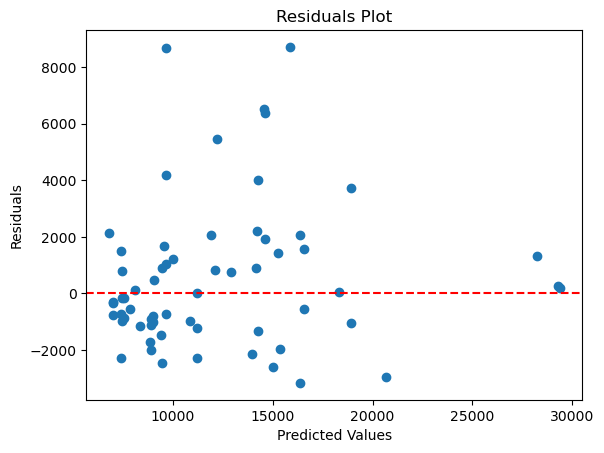

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [59]:
model_validation(AdaBoostRegressor(),x_train,y_train,x_test,y_test)

**SCORECARD OF ALL MODELS**

In [60]:
scorecard_reg

,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),0.814406,1692.985454,6.818681e+06,2611.260421,0.122995
1,GradientBoostingRegressor(),0.821637,1675.344553,6.552987e+06,2559.880354,0.125552
2,"XGBRegressor(base_score=None, booster=None, ca...",0.841940,1489.086756,5.807057e+06,2409.783561,0.111168
3,AdaBoostRegressor(),0.813527,1833.986226,6.850949e+06,2617.431683,0.144060


* XGBOOST IS THE BEST MODEL ACCORDING TO SCORES SO WE HAVE TO FURTHER FINE TUNE IT

### TUNING OF XG-BOOST

In [61]:
best_xg = tuning_parameter(grid={'n_estimators':[150,200,250,],
                                   'learning_rate':[0.05,0.1,0.5,0.7,2],
                                  'max_depth':[2,3,4,5] ,'min_child_weight':[3,4,5,6,7],
                                 'gamma':[0.5,0.7,1]},
                           estimator=XGBRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [62]:
best_xg

{'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 150}

R-Squared: 0.83
Mean Absolute Error (MAE): 1687.13
Mean Squared Error (MSE): 6245995.09
Root Mean Squared Error (RMSE): 2499.2
Mean absolute percentage Error(MAPE) : 0.12


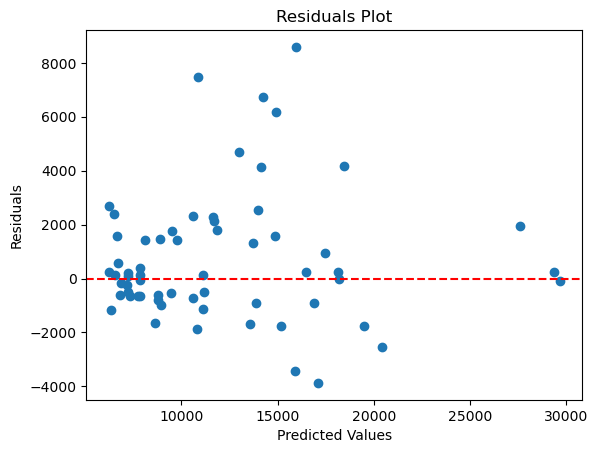

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [63]:
model_validation(XGBRegressor(**best_xg),x_train,y_train,x_test,y_test)

In [64]:
scorecard_reg

,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),0.814406,1692.985454,6.818681e+06,2611.260421,0.122995
1,GradientBoostingRegressor(),0.821637,1675.344553,6.552987e+06,2559.880354,0.125552
2,"XGBRegressor(base_score=None, booster=None, ca...",0.841940,1489.086756,5.807057e+06,2409.783561,0.111168
3,AdaBoostRegressor(),0.813527,1833.986226,6.850949e+06,2617.431683,0.144060
4,"XGBRegressor(base_score=None, booster=None, ca...",0.829993,1687.127126,6.245995e+06,2499.198890,0.124824


## FINAL MODEL

In [65]:
final_model = XGBRegressor()

In [66]:
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
pred_final =final_model.predict(x_test)

**FINAL SCORES**

In [68]:
print('R2:',r2_score(y_test,pred_final))
print('MSE:',mean_squared_error(y_test,pred_final))
print('RMSE:',mean_squared_error(y_test,pred_final)**0.5)
print('MAE:',mean_absolute_error(y_test,pred_final))
print('MAPE:',mean_absolute_percentage_error(y_test,pred_final))

R2: 0.8419404719970887
MSE: 5807056.8122094115
RMSE: 2409.783561278774
MAE: 1489.0867564264113
MAPE: 0.1111682242371672


# BUSSINESS INTERPRETATION

**THE FEATURES WHICH CAN BE ABLE TO `INCREASE` CAR PRICE `TREMENDIUSLY` ARE:-**
* ENGINESIZE
* ENGINELOCATION
* ENGINETYPE
* FUELTYPE


**THE FEATURES WHICH CAN BE ABLE TO `INCREASE` CAR PRICE `MODERATELY` ARE:-**
* HORSHPOWER
* FUELSYSTUM
* SYMBOLING


**THE FEATURES WHICH CAN BE ABLE TO `DECREASE` CAR PRICE ARE:-**
* CYLINDERNUMBER
* ASPIRATION
* STROKE

#### SUGGESTION

SO WE HAVE TO FOCUS ON 
`[ENGINELOCATION,
ENGINETYPE,
FUELTYPE,
ENGINESIZE]`
TO INCREASE THE CAR PRICE PROFITABILTY

-------------

In [69]:
fi=final_model.feature_importances_

In [70]:
fi_data = pd.DataFrame({'Feature Importance':fi},index=x_train.columns).sort_values(by='Feature Importance',ascending=False)

In [71]:
fi_data

,Feature Importance
enginesize,0.548999
curbweight,0.180132
fuelsystem,0.080822
carwidth,0.042678
peakrpm,0.032150
citympg,0.019591
horsepower,0.019176
drivewheel,0.016810
aspiration,0.014286
carheight,0.010098


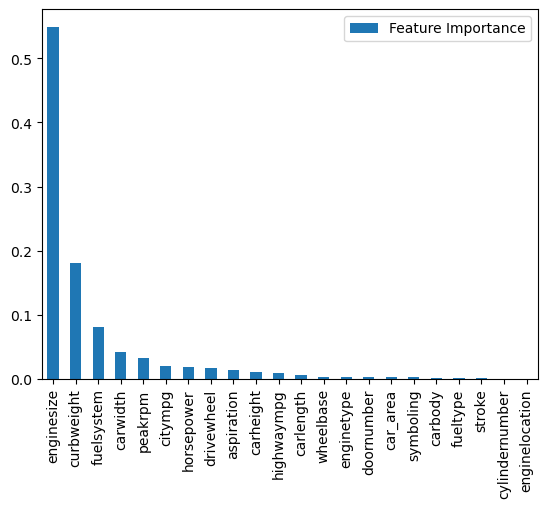

In [72]:
fi_data.plot(kind='bar')
plt.show()

# DEPLOYEMENT

In [73]:
# Save the final model as a pickle file

with open('final_model_XGBoost.pkl','wb') as file:
    pickle.dump(final_model,file)